In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import torch as tc
import matplotlib.pyplot as plt

In [3]:
dim = 8  # matrix dimension
lr = 2e-2  # learning rate
it_time = 500  # average iteration time

In [4]:
mat = tc.randn((dim, dim), dtype=tc.float64)
mat = (mat + mat.t()) / 2

In [12]:
print('---------------------- standard gradient descent ------------------------')

---------------------- standard gradient descent ------------------------


In [7]:
# initialize a random vector
v = tc.randn(dim, dtype=tc.float64)
v1 = v.clone()
v1.requires_grad = True

# store the max eigenvalue
loss_rec = tc.zeros(it_time, dtype=tc.float64)

for t in range(it_time):
    loss = -tc.einsum('a,ab,b', v1, mat, v1) / v1.dot(v1)
    loss.backward()
    v1.data = v1.data - lr * v1.grad
    v1.grad.data.zero_()
    loss_rec[t] = -loss.item()

In [13]:
print('---------------------- gradient descent using Adam optimizer ------------------------')

---------------------- gradient descent using Adam optimizer ------------------------


In [9]:
v1 = v.clone()
v1.requires_grad = True
optimizer = tc.optim.Adam([v1], lr=lr)
loss_rec1 = tc.zeros(it_time, dtype=tc.float64)
for t in range(it_time):
    loss = -tc.einsum('a,ab,b', v1, mat, v1) / v1.dot(v1)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_rec1[t] = -loss.item()

In [10]:
lm0, v0 = tc.linalg.eigh(mat)
lm_max = tc.max(lm0)

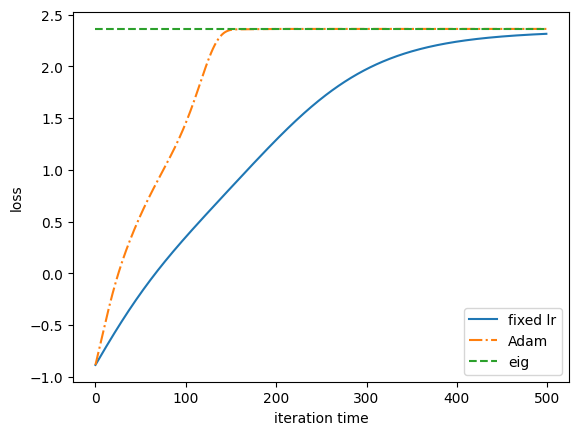

In [11]:
line1, = plt.plot(list(range(it_time)), loss_rec)
line2, = plt.plot(list(range(it_time)),
                  loss_rec1, linestyle='-.')
line3, = plt.plot(list(range(it_time)),
                  tc.ones(it_time) * lm_max, linestyle='--')
plt.legend([line1, line2, line3], ['fixed lr', 'Adam', 'eig'])
plt.xlabel('iteration time')
plt.ylabel('loss')
plt.show()